In [44]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import preliz as pz

zsh:1: command not found: conda


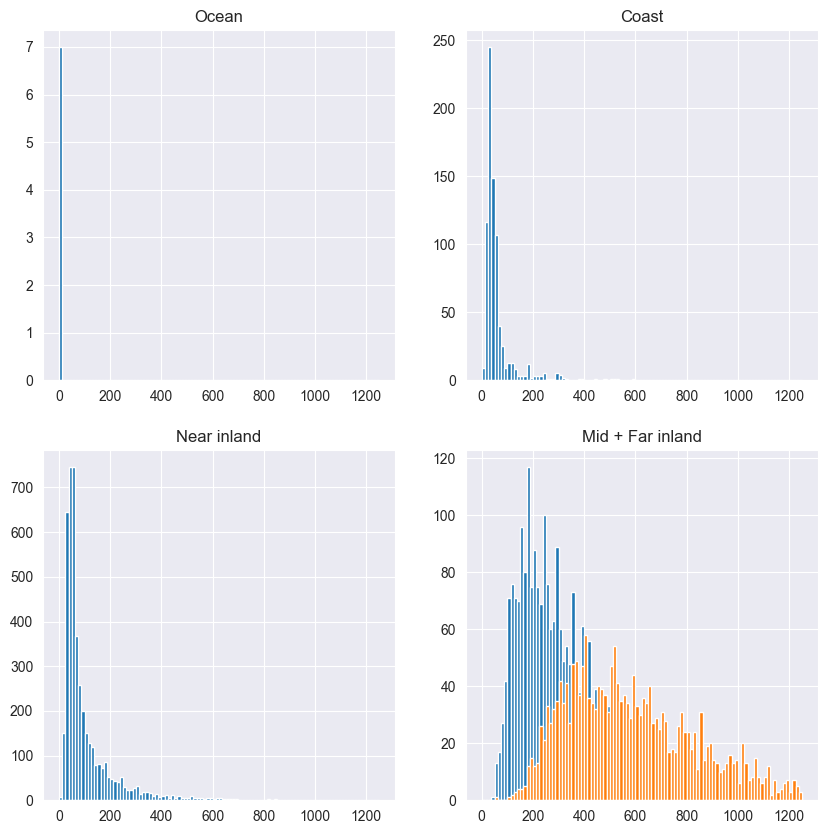

In [38]:
# Grab data
data = pd.read_csv('seedscraper_out.csv', dtype={'spawn_category':'category'})

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.hist(data[data.spawn_category == 'Ocean'].distance, bins=100, range=(0, 1250))
ax1.set_title('Ocean')
ax2.hist(data[data.spawn_category == 'Coast'].distance, bins=100, range=(0, 1250))
ax2.set_title('Coast')
ax3.hist(data[data.spawn_category == 'Near inland'].distance, bins=100, range=(0, 1250))
ax3.set_title('Near inland')
ax4.hist(data[data.spawn_category == 'Mid inland'].distance, bins=100, range=(0, 1250))
ax4.hist(data[data.spawn_category == 'Far inland'].distance, bins=100, range=(0, 1250))
ax4.set_title('Mid + Far inland')

idx = data.spawn_category.cat.codes.values
coords = {"spawn_category": data.spawn_category.cat.categories}

In [ ]:
with pm.Model(coords = coords) as model:
    mu_mu = pm.Gamma('mu_mu', mu = 100, sigma = 40)                                     # mean of means of normal
    mu_sigma = pm.Gamma('mu_sigma', mu = 50, sigma = 20)                                # std dev of means of normal
    
    sigma_mu = pm.Gamma('sigma_mu', mu = 30, sigma = 20)                                # mean of std devs of normal
    sigma_sigma = pm.Gamma('sigma_sigma', mu = 20, sigma = 10)                          # std dev of std devs of normal
    
    nu_mu = pm.Gamma('nu_mu', mu = 600, sigma = 100)                                    # mean of scales of exponential
    nu_sigma = pm.Gamma('nu_sigma', mu = 70, sigma = 30)                                # std dev of scales of exponential

    mu = pm.Gamma('mu', mu=mu_mu, sigma=mu_sigma, dims="spawn_category")                # mean of normal
    sigma = pm.Gamma('sigma', mu=sigma_mu, sigma=sigma_sigma, dims="spawn_category")    # std dev of normal
    nu = pm.Gamma('nu', mu=nu_mu, sigma=nu_sigma, dims="spawn_category")                # scale of exponential
    
    y = pm.ExGaussian('y', mu=mu[idx], sigma=sigma[idx], nu=nu[idx], observed=data.distance)
    
    idata = pm.sample(progressbar=True)#target_accept = 0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_mu, mu_sigma, sigma_mu, sigma_sigma, nu_mu, nu_sigma, mu, sigma, nu]


Output()

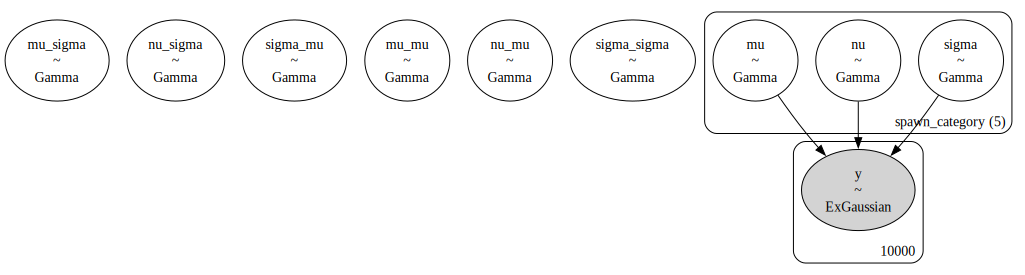

In [54]:
pm.model_to_graphviz(model)

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'mu_mu'}>,
        <Axes: title={'center': 'mu_mu'}>],
       [<Axes: title={'center': 'mu_sigma'}>,
        <Axes: title={'center': 'mu_sigma'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>],
       [<Axes: title={'center': 'nu_mu'}>,
        <Axes: title={'center': 'nu_mu'}>],
       [<Axes: title={'center': 'nu_sigma'}>,
        <Axes: title={'center': 'nu_sigma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'sigma_mu'}>,
        <Axes: title={'center': 'sigma_mu'}>],
       [<Axes: title={'center': 'sigma_sigma'}>,
        <Axes: title={'center': 'sigma_sigma'}>]], dtype=object)

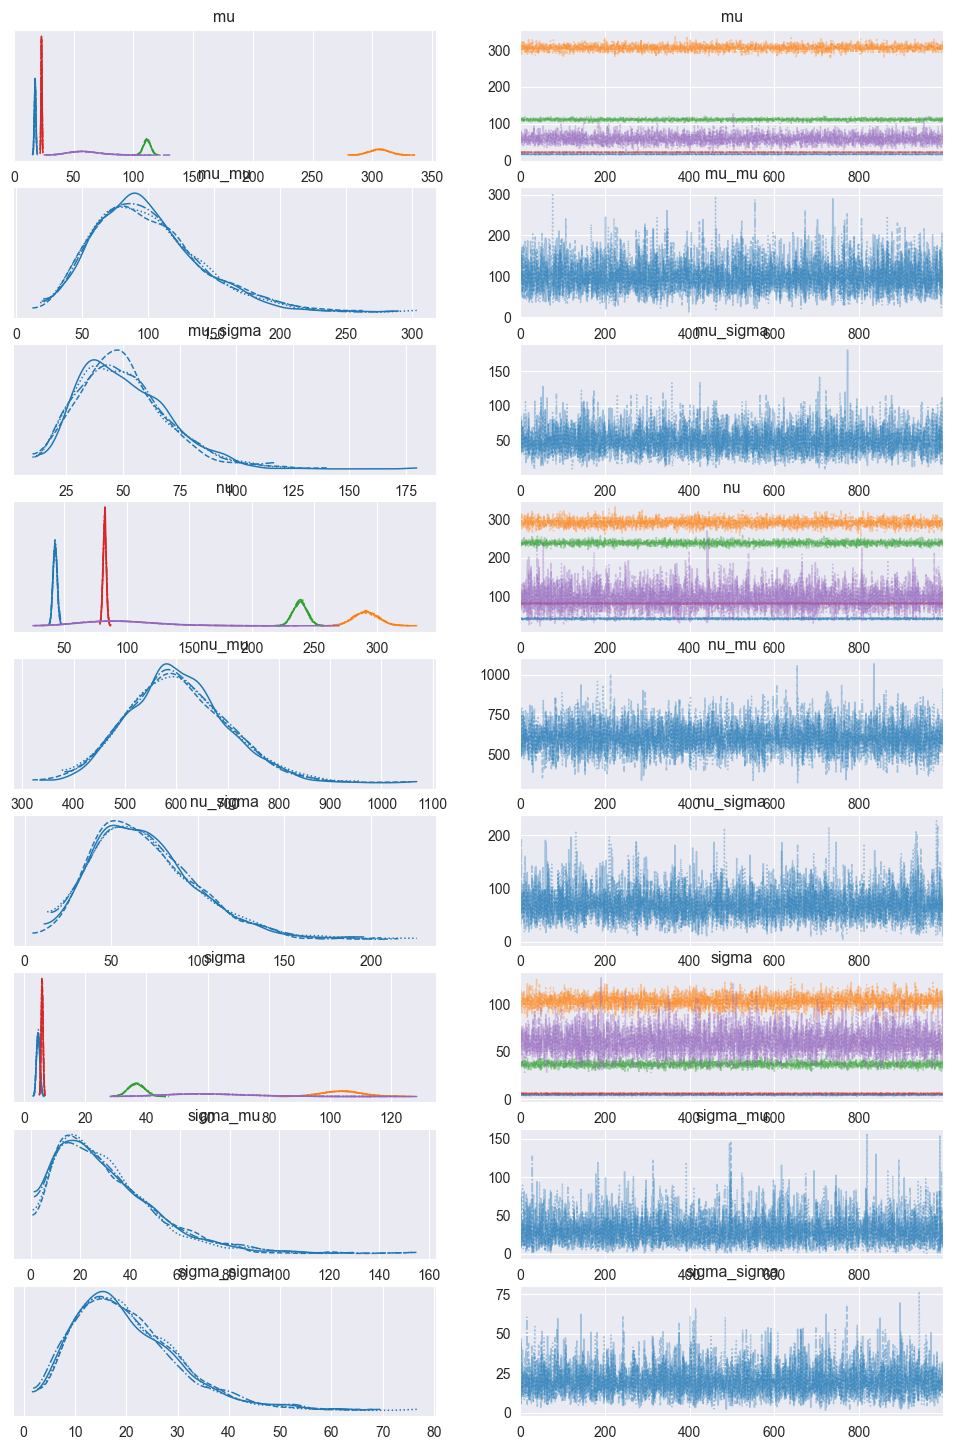

In [42]:
az.plot_trace(idata)

In [ ]:
az.rhat(idata)